In [1]:
# %pip install matplotlib
# %pip install seaborn

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

url_events = "https://flipquest-9db7e-default-rtdb.firebaseio.com/events.json"
url_sessions = "https://flipquest-9db7e-default-rtdb.firebaseio.com/sessions.json"

events_data = requests.get(url_events).json()
sessions_data = requests.get(url_sessions).json()


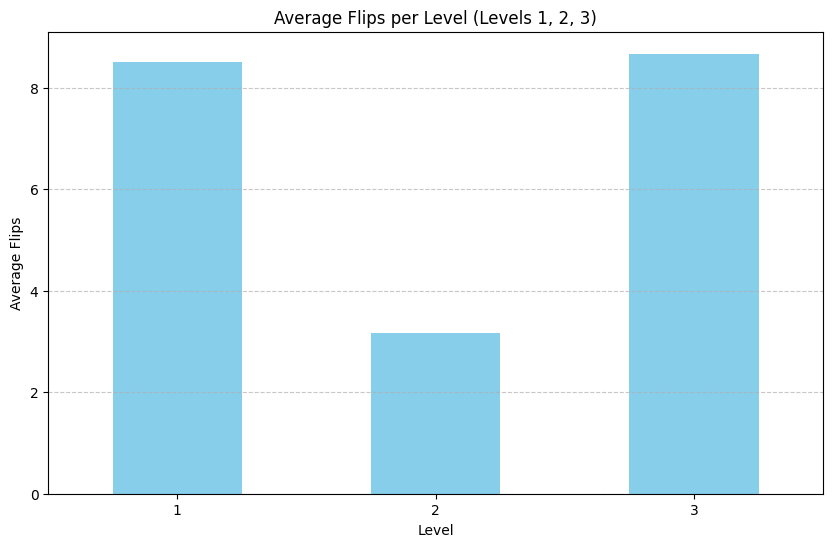

In [3]:

flips_per_level = []
for event in events_data.values():
    level_index = event.get('level_index')
    if level_index in [4, 5, 6]:  
        
        level = level_index - 3
        flips = event.get('flips')
        flips_per_level.append((level, flips))


df_flips = pd.DataFrame(flips_per_level, columns=['Level', 'Flips'])
avg_flips_per_level = df_flips.groupby('Level')['Flips'].mean()


plt.figure(figsize=(10, 6))
avg_flips_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Flips per Level (Levels 1, 2, 3)")
plt.xlabel("Level")
plt.ylabel("Average Flips")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Filtered Completion Data DataFrame:
     Level Completed
220      3     False
222      1      True
223      2     False
224      1      True
225      2      True
226      3      True
227      1     False
228      1      True
229      2     False
230      2     False
231      2     False
232      2     False
233      2     False
234      2      True
235      2      True
236      2     False
237      2      True
238      1      True
241      1      True
242      2      True
243      3      True

Completion Ratio per Level:
Level
1    83.333333
2    41.666667
3    66.666667
Name: Completed, dtype: object


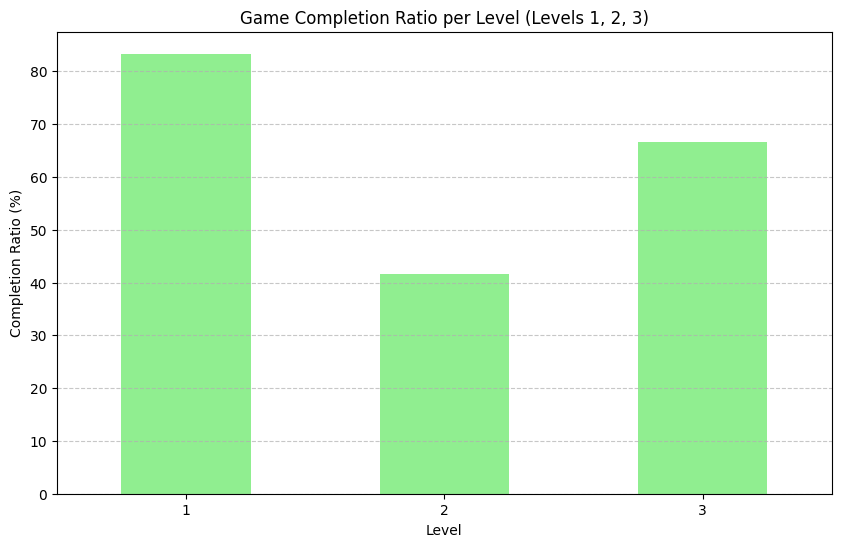

In [4]:
completion_data = []
for event in events_data.values():
    level_index = event.get('level_index')
    if level_index in [4, 5, 6]:  
        
        level = level_index - 3
        completed = event.get('finish')
        completion_data.append((level, completed))
        
df_completion = pd.DataFrame(completion_data, columns=['Level', 'Completed'])
df_completion = df_completion.dropna(subset=['Completed'])


print("Filtered Completion Data DataFrame:")
print(df_completion)

completion_ratio = df_completion.groupby('Level')['Completed'].mean() * 100  

print("\nCompletion Ratio per Level:")
print(completion_ratio)

plt.figure(figsize=(10, 6))
completion_ratio.plot(kind='bar', color='lightgreen')
plt.title("Game Completion Ratio per Level (Levels 1, 2, 3)")
plt.xlabel("Level")
plt.ylabel("Completion Ratio (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


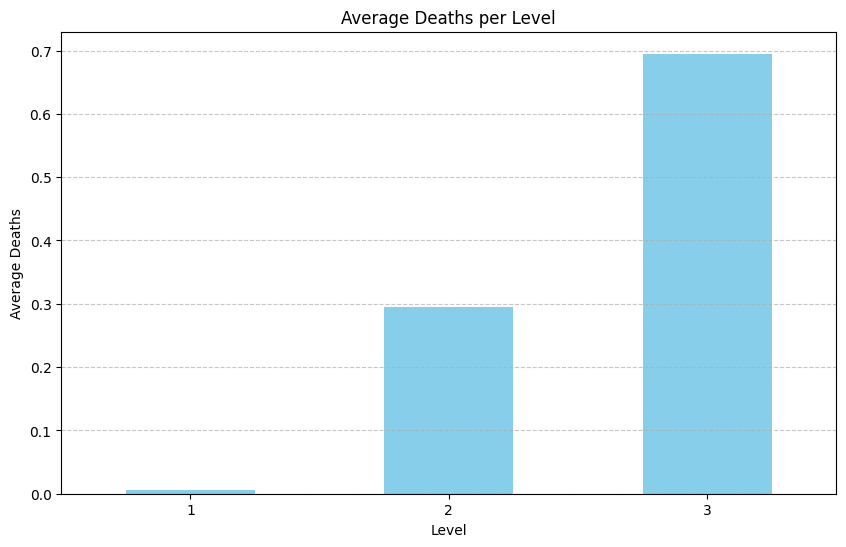

In [5]:
deaths_per_level = []
for session in sessions_data.values():
    crossed_checkpoints = session.get('crossedCheckpoints', [])
    if isinstance(crossed_checkpoints, list):
        for checkpoint in crossed_checkpoints:
            checkpoint_id = checkpoint.get('checkpointID', '')
            
            match = re.match(r'(\d+)[_l](\d+)', checkpoint_id)
            if match:
                level = match.group(1)  
                deaths = checkpoint.get('hitCount', 0)  
                deaths_per_level.append((int(level), deaths))  
                
df_deaths = pd.DataFrame(deaths_per_level, columns=['Level', 'Deaths'])
avg_deaths_per_level = df_deaths.groupby('Level')['Deaths'].mean()

plt.figure(figsize=(10, 6))
avg_deaths_per_level.plot(kind='bar', color='skyblue')
plt.title("Average Deaths per Level")
plt.xlabel("Level")
plt.ylabel("Average Deaths")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


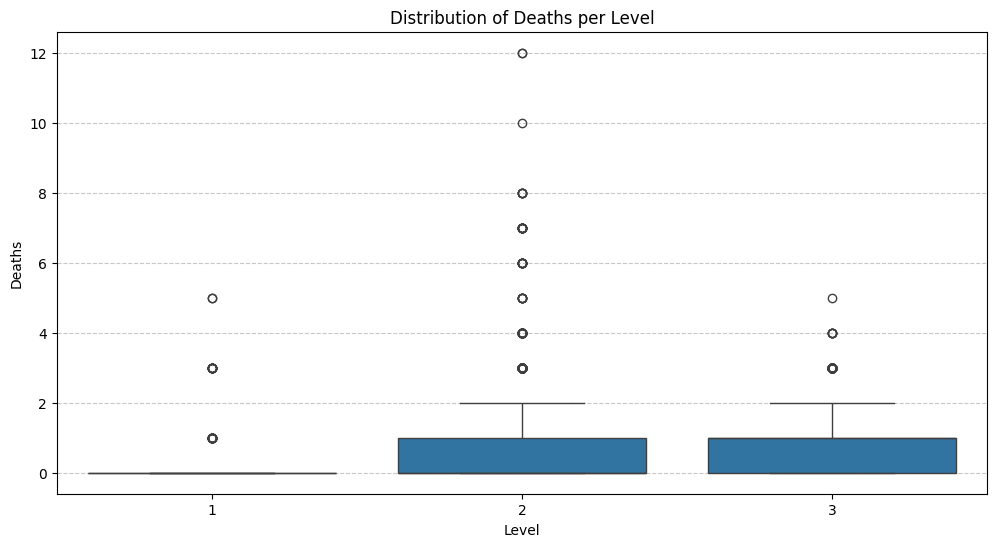

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Deaths', data=df_deaths)
plt.title("Distribution of Deaths per Level")
plt.xlabel("Level")
plt.ylabel("Deaths")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()